<a href="https://colab.research.google.com/github/zhoulijie2018/Deep_Learning/blob/main/perceptron_image_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#import packages
import h5py
import scipy
import numpy as np
from PIL import Image
from scipy import ndimage
import matplotlib.pyplot as plt

In [ ]:
#Load local files
from google.colab import files
files.upload()

In [5]:
def load_dataset():
    train_dataset = h5py.File('train_catvnoncat.h5', "r")
    train_set_x_orig = np.array(train_dataset["train_set_x"][:]) # train set features
    train_set_y_orig = np.array(train_dataset["train_set_y"][:]) # train set labels

    test_dataset = h5py.File('test_catvnoncat.h5', "r")
    test_set_x_orig = np.array(test_dataset["test_set_x"][:]) # test set features
    test_set_y_orig = np.array(test_dataset["test_set_y"][:]) # test set labels

    classes = np.array(test_dataset["list_classes"][:]) # the list of classes
    
    train_set_y_orig = train_set_y_orig.reshape((1, train_set_y_orig.shape[0]))
    test_set_y_orig = test_set_y_orig.reshape((1, test_set_y_orig.shape[0]))
    
    return train_set_x_orig, train_set_y_orig, test_set_x_orig, test_set_y_orig, classes

In [6]:
# Loading the data (cat/non-cat)
train_set_x_orig, train_set_y, test_set_x_orig, test_set_y, classes = load_dataset()

y = [0], it's a 'non-cat' picture.


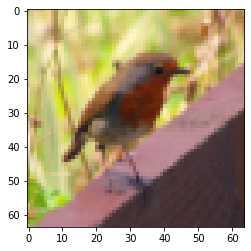

In [7]:
# Example of a picture
index = 10
plt.imshow(train_set_x_orig[index])

#Visualize an example
print ("y = " + str(train_set_y[:,index]) + ", it's a '" + classes[np.squeeze(train_set_y[:,index])].decode("utf-8") +  "' picture.")

In [10]:
m_train = train_set_y.shape[1]
m_test = test_set_y.shape[1]
num_px = train_set_x_orig.shape[1]

print ("Number of training examples: m_train = " + str(m_train))
print ("Number of testing examples: m_test = " + str(m_test))
print ("Height/Width of each image: num_px = " + str(num_px))
print ("Each image is of size: (" + str(num_px) + ", " + str(num_px) + ", 3)")
print ("train_set_x shape: " + str(train_set_x_orig.shape))
print ("train_set_y shape: " + str(train_set_y.shape))
print ("test_set_x shape: " + str(test_set_x_orig.shape))
print ("test_set_y shape: " + str(test_set_y.shape))

Number of training examples: m_train = 209
Number of testing examples: m_test = 50
Height/Width of each image: num_px = 64
Each image is of size: (64, 64, 3)
train_set_x shape: (209, 64, 64, 3)
train_set_y shape: (1, 209)
test_set_x shape: (50, 64, 64, 3)
test_set_y shape: (1, 50)


In [11]:
# Reshape the training and test examples

train_set_x_flatten = train_set_x_orig.reshape(train_set_x_orig.shape[0], -1).T
test_set_x_flatten = test_set_x_orig.reshape(test_set_x_orig.shape[0], -1).T

print ("train_set_x_flatten shape: " + str(train_set_x_flatten.shape))
print ("train_set_y shape: " + str(train_set_y.shape))
print ("test_set_x_flatten shape: " + str(test_set_x_flatten.shape))
print ("test_set_y shape: " + str(test_set_y.shape))

train_set_x_flatten shape: (12288, 209)
train_set_y shape: (1, 209)
test_set_x_flatten shape: (12288, 50)
test_set_y shape: (1, 50)


In [12]:
train_set_x = train_set_x_flatten / 255.
test_set_x = test_set_x_flatten / 255.

**Learning of Perceptron**

In [13]:
# Activation Function: sigmoid

def sigmoid(z):
    """
    Compute the sigmoid of z

    Arguments:
    x -- A scalar or numpy array of any size.

    Return:
    s -- sigmoid(z)
    """
    
    s = 1 / (1 + np.exp(-z))
    
    return s

In [14]:
# Testing sigmoid

print ("sigmoid(0) = " + str(sigmoid(0)))
print ("sigmoid(9.2) = " + str(sigmoid(9.2)))

sigmoid(0) = 0.5
sigmoid(9.2) = 0.9998989708060922


**Initializing Parameters**

In [15]:
# Initializing parameters: initialize_with_zeros

def initialize_with_zeros(dim):
    """
    This function creates a vector of zeros of shape (dim, 1) for w and initializes b to 0.
    
    Argument:
    dim -- size of the w vector we want (or number of parameters in this case)
    
    Returns:
    w -- initialized vector of shape (dim, 1)
    b -- initialized scalar (corresponds to the bias)
    """

    w = np.zeros(shape=(dim, 1))
    b = 1
    
    return w, b

In [16]:
# Testing parameter initialization
dim = 2
w, b = initialize_with_zeros(dim)
print ("w = " + str(w))
print ("b = " + str(b))

w = [[0.]
 [0.]]
b = 1


**Forward and Backward propagation**

In [17]:
# Propagation

def propagate(w, b, X, Y):
    """
    Implement the loss function and its gradient for the propagation

    Arguments:
    w -- weights, a numpy array of size (num_px * num_px * 3, 1)
    b -- bias, a scalar
    X -- data of size (num_px * num_px * 3, number of examples)
    Y -- true "label" vector (containing 0 if non-cat, 1 if cat) of size (1, number of examples)

    Return:
    loss -- negative log-likelihood loss for logistic regression
    dw -- gradient of the loss with respect to w, thus same shape as w
    db -- gradient of the loss with respect to b, thus same shape as b
    
    Tips:
    - Write your code step by step for the propagation
    """
    
    m = X.shape[1]
    
    # FORWARD PROPAGATION (FROM X TO LOSS)
    A = sigmoid(np.dot(w.T, X) + b)  # compute activation
    loss = (1.0 / (2*m)) * np.sum((Y - A)*(Y - A))   # compute loss
    
    # BACKWARD PROPAGATION (TO FIND GRAD)
    Z1 = np.dot(A, (1 - A).T)
    Z2 = np.dot(X, (Y - A).T)
    dw = (-1.0 / m) * (Z1*Z2)
    db = (-1.0 / m) * np.sum(Z1*(Y - A))

    assert(dw.shape == w.shape)
    assert(db.dtype == float)
    loss = np.squeeze(loss)
    assert(loss.shape == ())
    
    #gradient dictionary
    grads = {"dw": dw,
             "db": db}
    
    return grads, loss# Propagation

In [18]:
w, b, X, Y = np.array([[3], [5]]), 1, np.array([[2,2], [3,3]]), np.array([[0, 1]])
grads, loss = propagate(w, b, X, Y)
print ("dw = " + str(grads["dw"]))
print ("db = " + str(grads["db"]))
print ("loss = " + str(loss))

dw = [[5.57893731e-10]
 [8.36840596e-10]]
db = 2.7894686537271047e-10
loss = 0.24999999986052657


**Optimization**

In [19]:
# Optimization

def optimize(w, b, X, Y, num_iterations, learning_rate, print_loss = False):
    """
    This function optimizes w and b by running a gradient descent algorithm
    
    Arguments:
    w -- weights, a numpy array of size (num_px * num_px * 3, 1)
    b -- bias, a scalar
    X -- data of shape (num_px * num_px * 3, number of examples)
    Y -- true "label" vector (containing 0 if non-cat, 1 if cat), of shape (1, number of examples)
    num_iterations -- number of iterations of the optimization loop
    learning_rate -- learning rate of the gradient descent update rule
    print_loss -- True to print the loss every 100 steps
    
    Returns:
    params -- dictionary containing the weights w and bias b
    grads -- dictionary containing the gradients of the weights and bias with respect to the loss function
    loss -- list of all the loss computed during the optimization, this will be used to plot the learning curve.
    
    Tips:
        1) Calculate the loss and the gradient for the current parameters. Use propagate().
        2) Update the parameters using gradient descent rule for w and b.
    """
    
    losses = []
    
    for i in range(num_iterations):
        
        
        # Loss and gradient calculation (≈ 1-4 lines of code)
        grads, loss = propagate(w, b, X, Y)
        
        # Retrieve derivatives from grads
        dw = grads["dw"]
        db = grads["db"]
        
        # update rule (≈ 2 lines of code)
        #print(dw)
        #print (db)
        w = w - learning_rate * dw  # need to broadcast
        b = b - learning_rate * db
        
        # Record the losses
        if i % 100 == 0:
            losses.append(loss)
        
        # Print the loss every 100 training examples
        if print_loss and i % 100 == 0:
            print ("Loss after iteration %i: %f" % (i, loss))
    
    params = {"w": w,
              "b": b}
    
    grads = {"dw": dw,
             "db": db}
    
    return params, grads, losses

In [20]:
params, grads, losses = optimize(w, b, X, Y, num_iterations= 100, learning_rate = 0.009, print_loss = False)

print ("w = " + str(params["w"]))
print ("b = " + str(params["b"]))
print ("dw = " + str(grads["dw"]))
print ("db = " + str(grads["db"]))

w = [[3.]
 [5.]]
b = 0.9999999997489453
dw = [[5.57893731e-10]
 [8.36840596e-10]]
db = 2.7894686537271047e-10


**Prediction**

In [21]:
# Predict

def predict(w, b, X):
    '''
    Predict whether the label is 0 or 1 using learned logistic regression parameters (w, b)
    
    Arguments:
    w -- weights, a numpy array of size (num_px * num_px * 3, 1)
    b -- bias, a scalar
    X -- data of size (num_px * num_px * 3, number of examples)
    
    Returns:
    Y_prediction -- a numpy array (vector) containing all predictions (0/1) for the examples in X
    '''
    
    m = X.shape[1]
    Y_prediction = np.zeros((1, m))
    w = w.reshape(X.shape[0], 1)
    
    # Compute vector "A" predicting the probabilities of a cat being present in the picture
    A = sigmoid(np.dot(w.T, X) + b)
    
    for i in range(A.shape[1]):
        # Convert probabilities a[0,i] to actual predictions p[0,i]
        Y_prediction[0, i] = 1 if A[0, i] > 0.5 else 0
    
    assert(Y_prediction.shape == (1, m))
    
    return Y_prediction

In [22]:
print("predictions = " + str(predict(w, b, X)))

predictions = [[1. 1.]]


**Model**

In [23]:
# Model

def model(X_train, Y_train, X_test, Y_test, num_iterations=2000, learning_rate=0.5, print_loss=False):
    """
    Builds the logistic regression model by calling the function you've implemented previously
    
    Arguments:
    X_train -- training set represented by a numpy array of shape (num_px * num_px * 3, m_train)
    Y_train -- training labels represented by a numpy array (vector) of shape (1, m_train)
    X_test -- test set represented by a numpy array of shape (num_px * num_px * 3, m_test)
    Y_test -- test labels represented by a numpy array (vector) of shape (1, m_test)
    num_iterations -- hyperparameter representing the number of iterations to optimize the parameters
    learning_rate -- hyperparameter representing the learning rate used in the update rule of optimize()
    print_loss -- Set to true to print the loss every 100 iterations
    
    Returns:
    d -- dictionary containing information about the model.
    """
    
    # initialize parameters with zeros (≈ 1 line of code)
    w, b = initialize_with_zeros(X_train.shape[0])

    # Gradient descent (≈ 1 line of code)
    parameters, grads, losses = optimize(w, b, X_train, Y_train, num_iterations, learning_rate, print_loss)
    
    # Retrieve parameters w and b from dictionary "parameters"
    w = parameters["w"]
    b = parameters["b"]
    
    # Predict test/train set examples (≈ 2 lines of code)
    Y_prediction_test = predict(w, b, X_test)
    Y_prediction_train = predict(w, b, X_train)


    # Print train/test Errors
    print("train accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_train - Y_train)) * 100))
    print("test accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_test - Y_test)) * 100))

    
    d = {"losses": losses,
         "Y_prediction_test": Y_prediction_test, 
         "Y_prediction_train" : Y_prediction_train, 
         "w" : w, 
         "b" : b,
         "learning_rate" : learning_rate,
         "num_iterations": num_iterations}
    
    return d

**Train the model**

In [30]:
d = model(train_set_x, train_set_y, test_set_x, test_set_y, num_iterations = 2000, learning_rate = 0.001, print_loss = True)

Loss after iteration 0: 0.187624
Loss after iteration 100: 0.172240
Loss after iteration 200: 0.172250
Loss after iteration 300: 0.319585
Loss after iteration 400: 0.172092
Loss after iteration 500: 0.172089
Loss after iteration 600: 0.170303
Loss after iteration 700: 0.172076
Loss after iteration 800: 0.171288
Loss after iteration 900: 0.170424
Loss after iteration 1000: 0.170834
Loss after iteration 1100: 0.170778
Loss after iteration 1200: 0.255056
Loss after iteration 1300: 0.164101
Loss after iteration 1400: 0.170899
Loss after iteration 1500: 0.041121
Loss after iteration 1600: 0.170347
Loss after iteration 1700: 0.169593
Loss after iteration 1800: 0.057651
Loss after iteration 1900: 0.128996
train accuracy: 87.08133971291866 %
test accuracy: 50.0 %


Label is 1, Prediction is 0


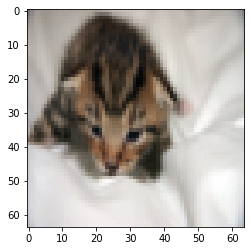

In [31]:
# Example of a picture that was wrongly classified.
index = 1
plt.imshow(test_set_x[:,index].reshape((num_px, num_px, 3)))
print ("Label is " + str(test_set_y[0][index]) + ", Prediction is " + str(int(d["Y_prediction_test"][0][index])) )

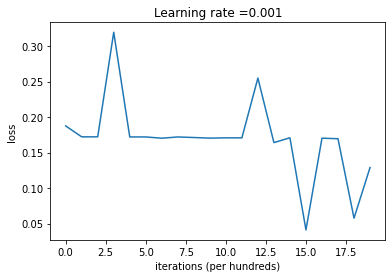

In [32]:
# Plot learning curve (with losses)
losses = np.squeeze(d['losses'])
plt.plot(losses)
plt.ylabel('loss')
plt.xlabel('iterations (per hundreds)')
plt.title("Learning rate =" + str(d["learning_rate"]))
plt.show()